<a href="https://colab.research.google.com/github/Griff-Kaiga/week-6-IP/blob/master/Griffin_Kaiga_Moringa_School_Week_6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Defining the Question

### a) Specifying the Question

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### b) Defining the Metric for Success


1.   Successfuly predicting home and away goals
2.   Developing a model with a high accuracy score
3.   



### c) Understanding the context 

### d) Recording the Experimental Design

### e) Data Relevance

## 2. Reading the Data

In [1]:
# importing the relevant libraries to be used 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import datetime as dt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Loading the Dataset 1
# Dataset url = /content/fifa_ranking.csv
#
ranking = pd.read_csv('/content/fifa_ranking.csv', parse_dates=['rank_date'])


In [3]:
# Loading the Dataset 2
# Dataset url = 
#
results = pd.read_csv('/content/results.csv',parse_dates=['date'])

## 3. Checking the Data

In [4]:
# Determining the no. of records in our dataset1
#
ranking.shape


(57793, 16)

In [5]:
# Determining the no. of records in our dataset 2
#
results.shape


(40839, 9)

In [6]:
# Previewing the top of our dataset 1
#
ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08


In [7]:
# Previewing the bottom of our dataset 1
# 
ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [8]:
# Previewing the top of our dataset 2
#
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [9]:
# Previewing the bottom of our dataset 2
# 
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [10]:
# splitting the rank_date column to month and year

ranking['month'] = pd.DatetimeIndex(ranking['rank_date']).month


ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8


In [11]:
# splitting the rank date column to year and month separtely for dataset 1

ranking['year'] = pd.DatetimeIndex(ranking['rank_date']).year


ranking.head() 

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1993
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1993


In [12]:
# splitting the date column to date and month for dateset 2

results['month'] = pd.DatetimeIndex(results['date']).month


results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3


In [13]:
#splitting date into date and year dataset 2
results['year'] = pd.DatetimeIndex(results['date']).year
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876


In [14]:
ranking['year'] = pd.DatetimeIndex(ranking['year']).month
ranking

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,month,year
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1
2,3,Switzerland,SUI,0.0,50,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1
3,4,Sweden,SWE,0.0,55,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,8,1
4,5,Argentina,ARG,0.0,51,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57788,206,Anguilla,AIA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07,6,1
57789,206,Bahamas,BAH,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONCACAF,2018-06-07,6,1
57790,206,Eritrea,ERI,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07,6,1
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07,6,1


In [15]:
# Checking whether each column has an appropriate datatype
#
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [16]:
# Checking whether each column has an appropriate datatype
#
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
 9   month       40839 non-null  int64         
 10  year        40839 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(4), object(5)
memory usage: 3.2+ MB


In [17]:
# merging the two datasets
merged_df = pd.merge(results, ranking, how = 'left', left_on = ['year', 'month'], right_on = ['year', 'month'])
merged_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,3,1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,3,1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

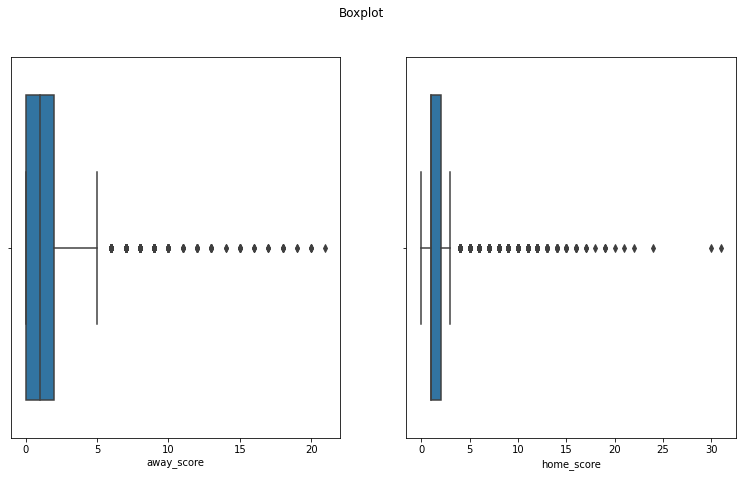

In [18]:
# checking for outliers
#
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 7))
fig.suptitle('Boxplot')
sns.boxplot(merged_df['away_score'], ax=ax1)
sns.boxplot(merged_df['home_score'], ax=ax2)


In [19]:
# Checking for Anomalies
#
print(ranking.nunique())
print(results.nunique())

rank                         209
country_full                 216
country_abrv                 216
total_points               11114
previous_points             1557
rank_change                  121
cur_year_avg                7419
cur_year_avg_weighted       7419
last_year_avg               7473
last_year_avg_weighted      7001
two_year_ago_avg            7575
two_year_ago_weighted       6513
three_year_ago_avg          7628
three_year_ago_weighted     5849
confederation                  6
rank_date                    286
month                         12
year                           1
dtype: int64
date          15115
home_team       309
away_team       306
home_score       26
away_score       22
tournament      109
city           1960
country         266
neutral           2
month            12
year            148
dtype: int64


In [20]:
# Identifying the Missing Data
# 
print(ranking.isnull())
print(results.isnull())
merged_df.isnull()

        rank  country_full  country_abrv  ...  rank_date  month   year
0      False         False         False  ...      False  False  False
1      False         False         False  ...      False  False  False
2      False         False         False  ...      False  False  False
3      False         False         False  ...      False  False  False
4      False         False         False  ...      False  False  False
...      ...           ...           ...  ...        ...    ...    ...
57788  False         False         False  ...      False  False  False
57789  False         False         False  ...      False  False  False
57790  False         False         False  ...      False  False  False
57791  False         False         False  ...      False  False  False
57792  False         False         False  ...      False  False  False

[57793 rows x 18 columns]
        date  home_team  away_team  home_score  ...  country  neutral  month   year
0      False      False      False   

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
40835,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
40836,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
40837,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [21]:
# Dealing with the Missing Data
#
merged_df.isnull().sum()

date                           0
home_team                      0
away_team                      0
home_score                     0
away_score                     0
tournament                     0
city                           0
country                        0
neutral                        0
month                          0
year                           0
rank                       40839
country_full               40839
country_abrv               40839
total_points               40839
previous_points            40839
rank_change                40839
cur_year_avg               40839
cur_year_avg_weighted      40839
last_year_avg              40839
last_year_avg_weighted     40839
two_year_ago_avg           40839
two_year_ago_weighted      40839
three_year_ago_avg         40839
three_year_ago_weighted    40839
confederation              40839
rank_date                  40839
dtype: int64

In [22]:
# More data cleaning procedures
#
merged_df = merged_df.drop(columns=['date', 'rank_date','country_full', 'cur_year_avg', 'cur_year_avg_weighted'])
merged_df

,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month,year,rank,country_abrv,total_points,previous_points,rank_change,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation
0,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,11,1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,England,Scotland,4,2,Friendly,London,England,False,3,1873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,England,Scotland,2,2,Friendly,London,England,False,3,1875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40835,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40836,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True,7,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# measures of central tendencies
merged_df.describe()

,home_score,away_score,month,year,rank,total_points,previous_points,rank_change,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted
count,40839.000000,40839.000000,40839.000000,40839.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1.745709,1.188105,6.748353,1989.949044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.749145,1.405120,3.235726,24.182304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,1.000000,1872.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.000000,0.000000,4.000000,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.000000,1.000000,6.000000,1997.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.000000,2.000000,10.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,31.000000,21.000000,12.000000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 6. Exploratory Analysis

In [24]:
# determining kurtosis 
home_kurt=merged_df['home_score'].kurt()
away_kurt = merged_df['away_score'].kurt()
print(home_kurt)
print(away_kurt)

11.71410446777048
15.757919940541624


In [25]:
# determining skewness
home = merged_df['home_score'].skew()
print(home)
away = merged_df['away_score'].skew()
print(away)

2.2015038640372713
2.59058860926579


In [26]:
# Ploting the univariate summaries and recording our observations
#
merged_df.tournament.value_counts()


Friendly                                16911
FIFA World Cup qualification             7100
UEFA Euro qualification                  2432
African Cup of Nations qualification     1616
FIFA World Cup                            900
                                        ...  
Dragon Cup                                  4
World Unity Cup                             4
Copa América qualification                  2
Atlantic Heritage Cup                       2
AFF Championship qualification              2
Name: tournament, Length: 109, dtype: int64

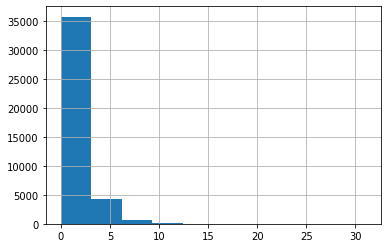

In [27]:
# hist plot for the home scores
merged_df['home_score'].hist()


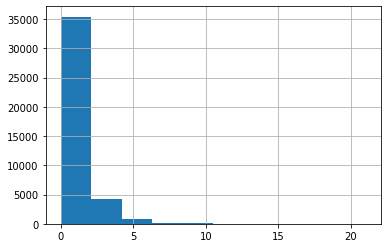

In [28]:
merged_df['away_score'].hist()

bivariate summaries

In [29]:
# obtaining the home score, away score, tournament
merged_df1 = merged_df[['home_score', 'away_score', 'tournament','rank']]
merged_df1

,home_score,away_score,tournament,rank
0,0,0,Friendly,NaN
1,4,2,Friendly,NaN
2,2,1,Friendly,NaN
3,2,2,Friendly,NaN
4,3,0,Friendly,NaN
...,...,...,...,...
40834,8,1,Pacific Games,NaN
40835,4,4,Pacific Games,NaN
40836,0,1,African Cup of Nations,NaN
40837,0,1,Intercontinental Cup,NaN


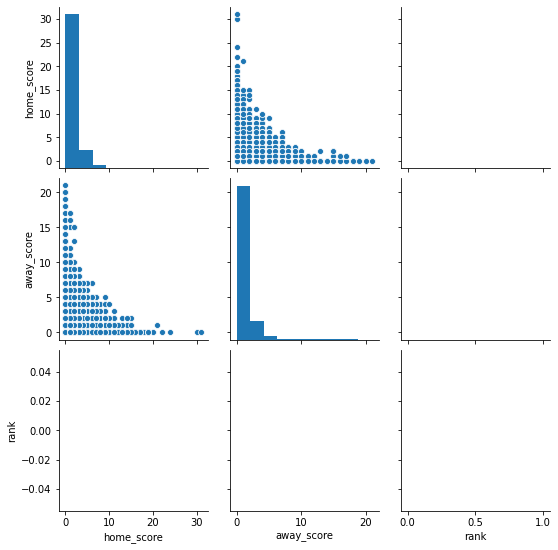

In [30]:
#plotting the bivariate summaries and recording the observations
sns.pairplot(merged_df1)
plt.show()

In [31]:
merged_df1.corr()

,home_score,away_score,rank
home_score,1.000000,-0.133412,NaN
away_score,-0.133412,1.000000,NaN
rank,NaN,NaN,NaN


## 7. Implementing the Solution

In [32]:
# Implementing the Solution
# 
# Creating a function to be used to create a win, draw or lose column
#
merged_df1['score'] = merged_df1.home_score - merged_df1.away_score
def result(goals):
  if goals > 0:
    return 'Win'
  elif goals < 0:
    return 'Lose'
  else:
    return 'Draw'
# Applying the result function to the dataframe
#
merged_df1['result'] = merged_df1.score.apply(lambda x: result(x))
merged_df1
# Dropping the score column, as it has served its purpose
merged_df1.drop('score', axis = 1, inplace = True)
# Creating a column of total goals scored
#
merged_df1['total_goals'] = merged_df1.home_score + merged_df1.away_score

# Previewing
merged_df1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,home_score,away_score,tournament,rank,result,total_goals
0,0,0,Friendly,NaN,Draw,0
1,4,2,Friendly,NaN,Win,6
2,2,1,Friendly,NaN,Win,3
3,2,2,Friendly,NaN,Draw,4
4,3,0,Friendly,NaN,Win,3
...,...,...,...,...,...,...
40834,8,1,Pacific Games,NaN,Win,9
40835,4,4,Pacific Games,NaN,Draw,8
40836,0,1,African Cup of Nations,NaN,Lose,1
40837,0,1,Intercontinental Cup,NaN,Lose,1


In [35]:
merged_dict = merged_df[['home_team']]
merged_dict
# turn merged_df into dict
merged_dict = merged_dict.to_dict(orient='records') # turn each row as key-value pairs
# show merged_dict
merged_dict

[{'home_team': 'Scotland'},
 {'home_team': 'England'},
 {'home_team': 'Scotland'},
 {'home_team': 'England'},
 {'home_team': 'Scotland'},
 {'home_team': 'Scotland'},
 {'home_team': 'England'},
 {'home_team': 'Wales'},
 {'home_team': 'Scotland'},
 {'home_team': 'Scotland'},
 {'home_team': 'England'},
 {'home_team': 'England'},
 {'home_team': 'Wales'},
 {'home_team': 'Scotland'},
 {'home_team': 'Wales'},
 {'home_team': 'Scotland'},
 {'home_team': 'England'},
 {'home_team': 'England'},
 {'home_team': 'Wales'},
 {'home_team': 'Northern Ireland'},
 {'home_team': 'Wales'},
 {'home_team': 'Scotland'},
 {'home_team': 'Wales'},
 {'home_team': 'Scotland'},
 {'home_team': 'England'},
 {'home_team': 'England'},
 {'home_team': 'England'},
 {'home_team': 'Wales'},
 {'home_team': 'Northern Ireland'},
 {'home_team': 'Northern Ireland'},
 {'home_team': 'Wales'},
 {'home_team': 'Northern Ireland'},
 {'home_team': 'Scotland'},
 {'home_team': 'Wales'},
 {'home_team': 'Scotland'},
 {'home_team': 'England'}

In [36]:
# DictVectorizer
from sklearn.feature_extraction import DictVectorizer
# instantiate a Dictvectorizer object for merged_df
dv_merged = DictVectorizer(sparse=False) 
# sparse = False makes the output is not a sparse matrix

In [37]:
# apply dv_X on X_dict
merged_encoded = dv_merged.fit_transform(merged_dict)
# show X_encoded
merged_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
# vocabulary
vocab = dv_merged.vocabulary_
# show vocab
vocab

{'home_team=Abkhazia': 0,
 'home_team=Afghanistan': 1,
 'home_team=Albania': 2,
 'home_team=Alderney': 3,
 'home_team=Algeria': 4,
 'home_team=American Samoa': 5,
 'home_team=Andalusia': 6,
 'home_team=Andorra': 7,
 'home_team=Angola': 8,
 'home_team=Anguilla': 9,
 'home_team=Antigua and Barbuda': 10,
 'home_team=Arameans Suryoye': 11,
 'home_team=Argentina': 12,
 'home_team=Armenia': 13,
 'home_team=Artsakh': 14,
 'home_team=Aruba': 15,
 'home_team=Australia': 16,
 'home_team=Austria': 17,
 'home_team=Azerbaijan': 18,
 'home_team=Bahamas': 19,
 'home_team=Bahrain': 20,
 'home_team=Bangladesh': 21,
 'home_team=Barawa': 22,
 'home_team=Barbados': 23,
 'home_team=Basque Country': 24,
 'home_team=Belarus': 25,
 'home_team=Belgium': 26,
 'home_team=Belize': 27,
 'home_team=Benin': 28,
 'home_team=Bermuda': 29,
 'home_team=Bhutan': 30,
 'home_team=Bolivia': 31,
 'home_team=Bonaire': 32,
 'home_team=Bosnia and Herzegovina': 33,
 'home_team=Botswana': 34,
 'home_team=Brazil': 35,
 'home_team=

ValueError: ignored

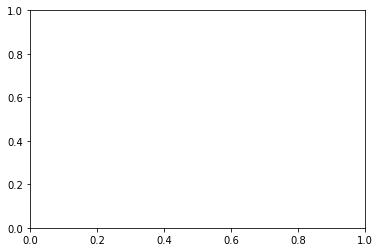

In [45]:
X = vocab
y = merged_df['away_score']
plt.scatter(X, y, color='blue') 
plt.title('Salary')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?